<a href="https://colab.research.google.com/github/gabrielrigo1302/2022_projeto_01/blob/main/TCC_2_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploração


In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import signal
from scipy import stats
import numpy as np
from statistics import mode, median


# carregando o arquivo matlab (Exercício 1 do indivíduo 1);
mat = loadmat('drive/MyDrive/UNISINOS/9o semestre/TCC-2/primeiro_teste/S1_A1_E1.mat')
emg_samples = mat['emg']
stimulus_samples = mat['stimulus']

# Entendendo melhor os dados

Segundo o própio NINAPRO:

O conjunto de dados inclui até 10 repetições de 49 movimentos manuais. Os sujeitos foram solicitados a pensar em repetir o mais naturalmente possível os movimentos que foram mostrados como filmes na tela de um laptop. O experimento é dividido em três exercícios:

1.   Movimentos básicos dos dedos.
2.   Agarrar e movimentos funcionais.
3.   Padrões de força.

*   Taxa de Amostragem dos sinais sEMG: 2KHz.
*   Duração da Repetição do Movimento: 5s.
*   Duração do Descanso: 3s

Baseado nisso é possível concluir:

São 2000 amostras por segundo (2KHz = 2000 vezes por segundo)
São 10000 amostras de movimento (2000 amostras/s * 5 segundos)
São 6000 amostras de descanso (2000 amostras/s * 3 segundos)

No caso 10000 de movimento seguidas de 6000 de descanso

In [35]:
# sample_items = mat.items()

In [36]:
# for key, value in sample_items:
#   if key == "subject":
#     print('Indivíduo: ', value);
#   if key == "exercise":
#     print('Exercício: ', value);

In [37]:
# for key, value in sample_items:
#   if key == "emg":
#   # print('key === ', key, '\nvalue === ', value)
#     print('Quantidade total de elementos === ', value.size)
#     print('Quantidade de elementos em cada dimensão === ', value.shape)
#     print('Tipo dos dados === ', value.dtype)
#     print('Número de dimensões === ', value.ndim)
#   # for v in value:
#   #   print('v === ', v)

# **IMPORTANTE**

A partir disso é possível concluir:

Nesse arquivo temos o:

1o movimento, do 1o indivíduo, repetido 10 vezes, com 101014 amostras por vez

In [38]:
# for key in mat.keys():
#   print("key == ", key)

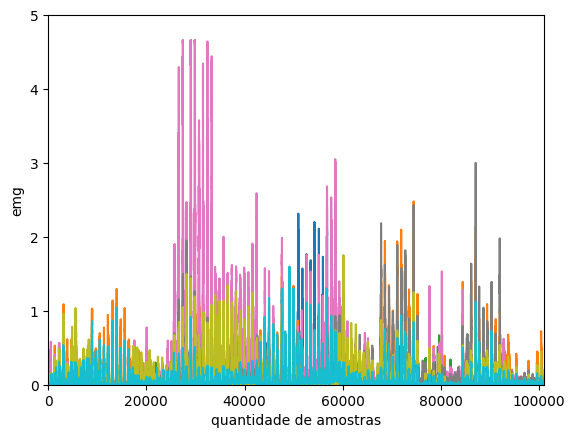

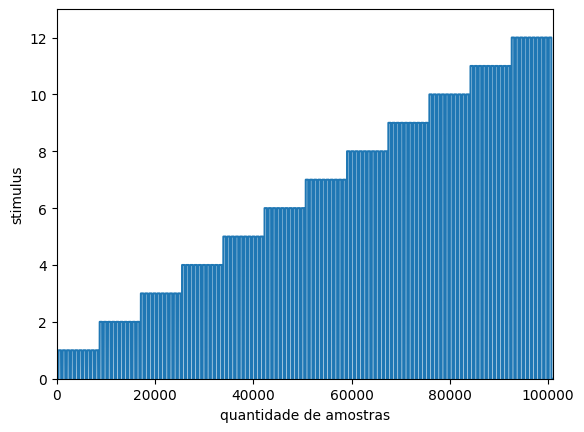

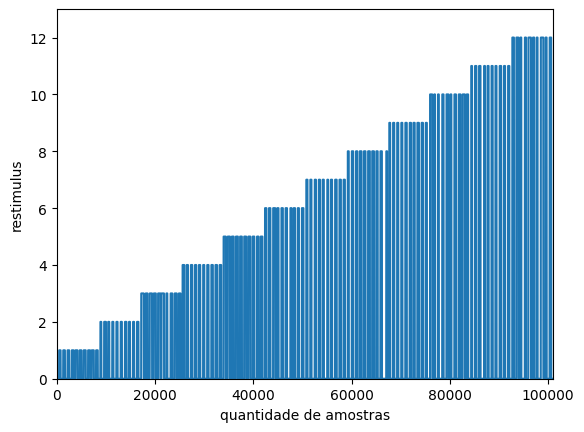

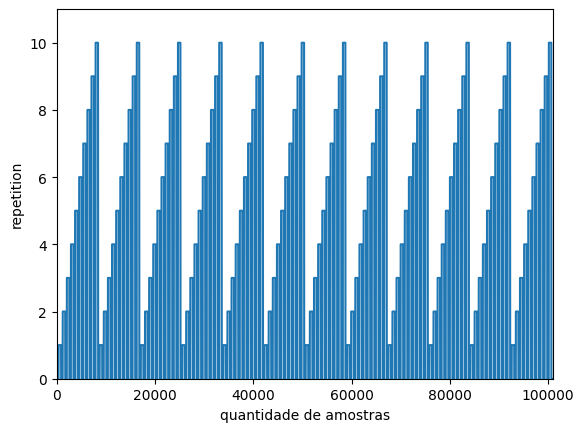

In [39]:
FIRST_SAMPLE = 0
LAST_SAMPLE = 101014

# Traçando os gráficos associados
# stimulus: apresenta o intervalo do movimento e qual o gesto/movimento (1 a 12)
# restimulus: apresenta o intervalo do movimento (com refinamento) e qual o movimento (1 a 12)
# repetition: apresenta a repetição (1 a 10) do movimento x (10 repetições do movimento 1, 10 repetições do movimento 2, etc)

for key in mat.keys():

    if key == 'emg':
        plt.figure()
        plt.plot(mat['emg'])
        plt.ylim(0, 5.0)
        plt.ylabel('emg')
        plt.xlabel('quantidade de amostras')
        plt.xlim(FIRST_SAMPLE, LAST_SAMPLE)

    if key == 'stimulus':
        plt.figure()
        plt.plot(mat['stimulus'])
        plt.ylim(0, 13.0)
        plt.ylabel('stimulus')
        plt.xlabel('quantidade de amostras')
        plt.xlim(FIRST_SAMPLE, LAST_SAMPLE)

    if key == 'restimulus':
        plt.figure()
        plt.plot(mat['restimulus'])
        plt.ylim(0, 13.0)
        plt.ylabel('restimulus')
        plt.xlabel('quantidade de amostras')
        plt.xlim(FIRST_SAMPLE, LAST_SAMPLE)

    if key == 'rerepetition':
        plt.figure()
        plt.plot(mat['repetition'])
        plt.ylim(0, 11.0)
        plt.ylabel('repetition')
        plt.xlabel('quantidade de amostras')
        plt.xlim(FIRST_SAMPLE, LAST_SAMPLE)


plt.show()



In [40]:
# # data = mat['emg']

# colors = ['b', 'g', 'r', 'c', 'm', 'y', 'b', 'w'];

# for i in range(data.shape[1]):
#   plt.plot(data[:, i], label=f'Column {i+1}', color=colors[int(i/2)])
#   plt.xlabel('X-axis label')
#   plt.ylabel('Y-axis label')
#   plt.title('Plotting MATLAB data in Python')
#   plt.legend()
#   plt.show()

In [41]:
# # dados_emg = mat['emg']

# # Definir variáveis
# numero_amostras = dados_emg.shape[0]  # Quantidade total de elementos (1010140)
# numero_repeticoes = dados_emg.shape[1]  # Quantidade de repetições (10)

# # Criar array de índices das amostras
# indices_amostras = np.arange(numero_amostras)

# # Plotar as amostras em sequência
# for i in range(numero_repeticoes):
#     # Definir cor da repetição
#     cor = plt.cm.Spectral(i / numero_repeticoes)

#     # Plotar a repetição atual com pontos sem sobreposição
#     plt.scatter(indices_amostras + i * numero_amostras, dados_emg[:, i], s=1, alpha=0.7, color=cor, label=f'Repetição {i + 1}')

# # Ajustar escala do eixo X
# plt.xlim(0, numero_amostras)

# # Definir rótulos dos eixos
# plt.xlabel('Amostra')
# plt.ylabel('Valor EMG (μV)')

# # Adicionar legenda
# plt.legend(loc='best')

# # Ajustar tamanho da figura
# plt.figure(figsize=(50, 50))

# # Mostrar o gráfico
# plt.show()

In [42]:
# a = 101014/2000
# print('Tempo levado para buscar todas as amostras de uma repetição  === ', a)

In [43]:
# # Carregar os dados do arquivo .mat
# # dados_emg = mat['emg']

# # Definir variáveis
# numero_amostras = dados_emg.shape[0]  # Quantidade total de elementos (1010140)
# numero_repeticoes = dados_emg.shape[1]  # Quantidade de repetições (10)

# for i in range(numero_repeticoes):
#     # Definir a cor da repetição
#     cor = plt.cm.Spectral(i / numero_repeticoes)

#     # Plotar a repetição atual
#     plt.plot(dados_emg[:, i], color=cor, label=f'Repetição {i + 1}')

# # Definir rótulos dos eixos
# plt.xlabel('Amostra')
# plt.ylabel('Valor EMG (μV)')

# # Adicionar legenda
# plt.legend()

# # Mostrar o gráfico
# plt.show()

Filtro ButterWorth passa-baixa de primeira ordem,  com frequência de corte de 1Hz

Não parece estar funcionando corretamente

In [44]:
# # Definindo a frequência de corte em Hz
# cutoff_frequency = 1.0
# # Convertendo a frequência de corte para radianos por segundo
# # frequência de corte em radianos por segundo = 2 * PI * frequência de corte
# radians_cutoff_frequency = 2 * np.pi * cutoff_frequency

# # Criando a função de transferência do filtro passa-baixa de Butterworth de primeira ordem
# # H(s) = 1/[1+(s/2PI)] !Verificar

# numerator = [1]
# denominator = [1, radians_cutoff_frequency]

# b, a = signal.butter(1, 0.01, btype='low', analog=False) # Ajustar esses parâmetros

# dados_emg_filtrados = np.zeros_like(dados_emg)

# for i in range(numero_repeticoes):
#     dados_emg_filtrados[:, i] = signal.lfilter(b, a, dados_emg[:, i])

In [45]:
# plt.plot(dados_emg[:, 0], label='Sinal original')
# plt.xlabel('Amostras')
# plt.ylabel('Valor EMG (μV)')
# plt.legend()
# plt.title('Sinal EMG Original vs. Filtrado (1 Hz)')

# plt.plot(dados_emg_filtrados[:, 0], label='Sinal filtrado')
# plt.ylim(0, 2.5)
# plt.xlabel('Amostras')
# plt.ylabel('Valor EMG (μV)')
# plt.legend()
# plt.title('Sinal EMG Original vs. Filtrado (1 Hz)')

# plt.show()

# SEPARAÇÃO TESTE TREINO

In [46]:
def get_stimulus_ranges(samples, number_of_movements):
  response = [{
    'stimulus': 0,
    'first_index': 0,
    'last_index': 0,
    'repetitions': [],
  } for _ in range(number_of_movements)]

  previous_stimulus = samples[0]
  last_change_index = 0

  for sample_index in range(len(samples)):
    actual_stimulus = samples[sample_index][0]

    #validando se o próximo index não estoura o array
    if (sample_index + 1 < len(samples)):
      next_stimulus = samples[sample_index + 1][0]

      #valida se o stimulus atual é diferente do próximo e se o próximo é zero
      if (actual_stimulus != next_stimulus and next_stimulus == 0):
        #salva o index do  stimulus que vem antes de um stimulus 0
        last_change_index = sample_index

    if (actual_stimulus != previous_stimulus):

      if (actual_stimulus != 0):
        response[actual_stimulus-1]['stimulus'] = actual_stimulus
        response[actual_stimulus-1]['first_index'] = sample_index
        previous_stimulus = actual_stimulus

      if (actual_stimulus > 1):
        response[actual_stimulus-2]['last_index'] = last_change_index

    if (sample_index + 1 == len(samples)):
      response[actual_stimulus-1]['last_index'] = last_change_index

  return response


In [47]:
#!APENAS PARA TESTE = Valida quais números tem entre cada um dos ranges
def test_get_stimulus_ranges(samples, ranges):
  matched_values = []
  stimulus_index = 0
  sample_index = ranges[0]['first_index']

  while (sample_index <= ranges[len(ranges) - 1]['last_index']):
    if  (ranges[stimulus_index]['last_index'] < sample_index):
      print('last_index = ', sample_index-1)
      stimulus_index += 1
      sample_index = ranges[stimulus_index]['first_index']
      matched_values = []
      print('first_index = ', sample_index)

    if (samples[sample_index] not in matched_values):
      print(samples[sample_index])
      matched_values.append(samples[sample_index])

    else:
      sample_index += 1;

In [48]:
mat = loadmat('drive/MyDrive/UNISINOS/9o semestre/TCC-2/primeiro_teste/S1_A1_E1.mat')
stimulus_samples = mat['stimulus']

stimulus_ranges = get_stimulus_ranges(stimulus_samples, 12)

for stimulus_range in stimulus_ranges:
  print(stimulus_range);



{'stimulus': 1, 'first_index': 333, 'last_index': 8378, 'repetitions': []}
{'stimulus': 2, 'first_index': 8700, 'last_index': 16765, 'repetitions': []}
{'stimulus': 3, 'first_index': 17086, 'last_index': 25152, 'repetitions': []}
{'stimulus': 4, 'first_index': 25473, 'last_index': 33555, 'repetitions': []}
{'stimulus': 5, 'first_index': 33880, 'last_index': 41953, 'repetitions': []}
{'stimulus': 6, 'first_index': 42275, 'last_index': 50340, 'repetitions': []}
{'stimulus': 7, 'first_index': 50661, 'last_index': 58747, 'repetitions': []}
{'stimulus': 8, 'first_index': 59072, 'last_index': 67161, 'repetitions': []}
{'stimulus': 9, 'first_index': 67486, 'last_index': 75520, 'repetitions': []}
{'stimulus': 10, 'first_index': 75845, 'last_index': 83890, 'repetitions': []}
{'stimulus': 11, 'first_index': 84215, 'last_index': 92289, 'repetitions': []}
{'stimulus': 12, 'first_index': 92614, 'last_index': 100687, 'repetitions': []}


In [49]:
mat = loadmat('drive/MyDrive/UNISINOS/9o semestre/TCC-2/primeiro_teste/S1_A1_E1.mat')
stimulus_samples = mat['stimulus']

stimulus_ranges = test_get_stimulus_ranges(stimulus_samples, stimulus_ranges)

[1]
[0]
last_index =  8378
first_index =  8700
[2]
[0]
last_index =  16765
first_index =  17086
[3]
[0]
last_index =  25152
first_index =  25473
[4]
[0]
last_index =  33555
first_index =  33880
[5]
[0]
last_index =  41953
first_index =  42275
[6]
[0]
last_index =  50340
first_index =  50661
[7]
[0]
last_index =  58747
first_index =  59072
[8]
[0]
last_index =  67161
first_index =  67486
[9]
[0]
last_index =  75520
first_index =  75845
[10]
[0]
last_index =  83890
first_index =  84215
[11]
[0]
last_index =  92289
first_index =  92614
[12]
[0]


In [77]:
def split_repetition (stimulus_ranges_splited, s_samples, r_samples, repetition_quantity):
  for stimulus_range in stimulus_ranges_splited:
    #Como é crescente só preciso armazenar o último valor
    last_matched_repetition = 0
    repetitions = [{
      'repetition': index + 1,
      'first_index': 0,
      'last_index': 0
    } for index in range(repetition_quantity)]

    for index in range(int(stimulus_range['first_index']), len(s_samples)):
      if (stimulus_range['last_index'] < index):
        repetitions[int(r_samples[index])-1]['last_index'] = index - 1
        break

      elif (s_samples[index] !=0):
        if (r_samples[index] != last_matched_repetition):
          # repetition[]
          # print(s_samples[index], r_samples[index])
          last_matched_repetition = r_samples[index]
          repetitions[int(r_samples[index])-1]['first_index'] = index
          # print(repetitions[int(r_samples[index])-1])

        elif (r_samples[index+1] == 0):
          repetitions[int(r_samples[index])-1]['last_index'] = index


    stimulus_range['repetitions']=repetitions

  return stimulus_ranges_splited





In [78]:
mat = loadmat('drive/MyDrive/UNISINOS/9o semestre/TCC-2/primeiro_teste/S1_A1_E1.mat')
stimulus_samples = mat['stimulus']
repetition_samples = mat['repetition']

stimulus_ranges = get_stimulus_ranges(stimulus_samples, 12)

stimulus_ranges_with_repetition = split_repetition(stimulus_ranges, stimulus_samples, repetition_samples, 10)

for s in stimulus_ranges_with_repetition:
  print('stimulus == ', s['stimulus'])
  print('first_index == ', s['first_index'])
  print('last_index == ', s['last_index'])
  print()
  for r in s['repetitions']:
    print('r == ', r)
  print()

<ipython-input-77-4423e25d3953>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  repetitions[int(r_samples[index])-1]['first_index'] = index
<ipython-input-77-4423e25d3953>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  repetitions[int(r_samples[index])-1]['last_index'] = index
<ipython-input-77-4423e25d3953>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  repetitions[int(r_samples[index])-1]['last_index'] = index - 1


stimulus ==  1
first_index ==  333
last_index ==  8378

r ==  {'repetition': 1, 'first_index': 333, 'last_index': 848}
r ==  {'repetition': 2, 'first_index': 1169, 'last_index': 1684}
r ==  {'repetition': 3, 'first_index': 2009, 'last_index': 2525}
r ==  {'repetition': 4, 'first_index': 2846, 'last_index': 3357}
r ==  {'repetition': 5, 'first_index': 3682, 'last_index': 4197}
r ==  {'repetition': 6, 'first_index': 4518, 'last_index': 5029}
r ==  {'repetition': 7, 'first_index': 5351, 'last_index': 5866}
r ==  {'repetition': 8, 'first_index': 6195, 'last_index': 6706}
r ==  {'repetition': 9, 'first_index': 7027, 'last_index': 7542}
r ==  {'repetition': 10, 'first_index': 7863, 'last_index': 8378}

stimulus ==  2
first_index ==  8700
last_index ==  16765

r ==  {'repetition': 1, 'first_index': 8700, 'last_index': 9215}
r ==  {'repetition': 2, 'first_index': 9536, 'last_index': 10051}
r ==  {'repetition': 3, 'first_index': 10376, 'last_index': 10891}
r ==  {'repetition': 4, 'first_index':

# JANELAMENTO

In [52]:
mat = loadmat('drive/MyDrive/UNISINOS/9o semestre/TCC-2/primeiro_teste/S1_A1_E1.mat')
emg_samples = mat['emg']

In [53]:
#samples = amostras
#frequency = frequência de amostragem das amostras em Hertz(x amostras por segundo na prática)
#window_size = tamanho da janela em segundos
#gap = deslocamento das janelas em segundos
def windowing(samples, sensors_quantity: int, frequency: float, window_size: float, gap: float):
  # VARIÁVEIS APENAS INFORMATIVAS:

  # features_per_second = frequency * window_size
  # features_per_gap = frequency * gap

  samples_size = len(samples)

  #tem que ver como determinar o tamanho desse array ainda
  all_windows = [[] for _ in range(sensors_quantity)]

  #Lembrando da estrutura:
  #  Lista de todas as amostrages
  #  Lista de todos os sinais por sensor

  # loop através as amostras, iniciando sempre a partir do próximo gap
  for first_index in range(0, samples_size, gap):
    windows_by_sensors = [[] for _ in range(sensors_quantity)]

    for second_index in range(window_size):
      third_index = first_index + second_index

      if (third_index < samples_size):

        for fourth_index in range(len(samples[third_index])):
          windows_by_sensors[fourth_index].append(samples[third_index][fourth_index])

    for fifth_index in range(len(windows_by_sensors)):
      all_windows[fifth_index].append(windows_by_sensors[fifth_index])

  return all_windows

In [54]:
#samples = amostras
#frequency = frequência de amostragem das amostras em Hertz(x amostras por segundo na prática)
#window_size = tamanho da janela em segundos
#gap = deslocamento das janelas em segundos
c = emg_samples[:100]
windows_by_sensors = windowing(c, 10, 1, 10, 5)

print("windows size === ", len(windows_by_sensors))
for r in range(len(windows_by_sensors)):
  print("Sensor No ", r+1, " Windows === ", windows_by_sensors[r])


windows size ===  10
Sensor No  1  Windows ===  [[0.0684, 0.0586, 0.0562, 0.0562, 0.0488, 0.0488, 0.0439, 0.0464, 0.0464, 0.0415], [0.0488, 0.0439, 0.0464, 0.0464, 0.0415, 0.0464, 0.0464, 0.0415, 0.0342, 0.0269], [0.0464, 0.0464, 0.0415, 0.0342, 0.0269, 0.0391, 0.0415, 0.0391, 0.0366, 0.0391], [0.0391, 0.0415, 0.0391, 0.0366, 0.0391, 0.0391, 0.0391, 0.0415, 0.0366, 0.0293], [0.0391, 0.0391, 0.0415, 0.0366, 0.0293, 0.0269, 0.0439, 0.0488, 0.0513, 0.0513], [0.0269, 0.0439, 0.0488, 0.0513, 0.0513, 0.0562, 0.0537, 0.0464, 0.0391, 0.0317], [0.0562, 0.0537, 0.0464, 0.0391, 0.0317, 0.0244, 0.022, 0.0171, 0.0171, 0.0269], [0.0244, 0.022, 0.0171, 0.0171, 0.0269, 0.0366, 0.0391, 0.0366, 0.0293, 0.0269], [0.0366, 0.0391, 0.0366, 0.0293, 0.0269, 0.022, 0.0171, 0.0122, 0.0195, 0.0342], [0.022, 0.0171, 0.0122, 0.0195, 0.0342, 0.0488, 0.0537, 0.0513, 0.0488, 0.0439], [0.0488, 0.0537, 0.0513, 0.0488, 0.0439, 0.0391, 0.0317, 0.0269, 0.0244, 0.0293], [0.0391, 0.0317, 0.0269, 0.0244, 0.0293, 0.0439, 0.04

# Features

## RMS - Root Mean Square

In [55]:
# monta uma lista com as mesmas dimensões da lista de janelamento para armazenar o
# resultado da feature de emg
def generate_rmg_features(windows_by_sensors):
  rmg_windows = [[] for sensor_windows in windows_by_sensors]

  for sensor_index in range(len(windows_by_sensors)):
    sensor_windows = windows_by_sensors[sensor_index]

    for window in sensor_windows:
      np_window = np.array(window)
      window_rms = np.sqrt(np.mean(np_window**2))

      rmg_windows[sensor_index].append(window_rms)

  return rmg_windows



In [56]:
windows_by_sensors = windowing(emg_samples[:10],10, 1, 10, 5)
rmg_features = generate_rmg_features(windows_by_sensors)

for sensor_index in range (len(rmg_features)):
  print(sensor_index, ' === ',  rmg_features[sensor_index])

0  ===  [0.052103416394704866, 0.04546827465387267]
1  ===  [0.0024, 0.0024]
2  ===  [0.002754087870784082, 0.0030675723300355932]
3  ===  [0.0024, 0.0024]
4  ===  [0.0024, 0.0024]
5  ===  [0.00450144421269441, 0.0024]
6  ===  [0.0024, 0.0024]
7  ===  [0.038078419084830714, 0.0356593886655394]
8  ===  [0.0024, 0.0024]
9  ===  [0.018321217208471713, 0.0067469993330368724]


# Média, Moda, Mediana, RMS


In [57]:
# monta uma lista com as mesmas dimensões da lista de janelamento para armazenar o
# resultado da feature de emg (média)
# features = chaves das features ['mean', 'mode', 'median', 'rms']
def generate_mean_features(windows_by_sensors, features):
  mean_windows = [[] for sensor_windows in windows_by_sensors]

  for sensor_index in range(len(windows_by_sensors)):
    sensor_windows = windows_by_sensors[sensor_index]

    for window in sensor_windows:
      features_dict = {}

      if ('mean' in features):
        window_mean = sum(window) / len(window)
        features_dict['mean'] = window_mean

      if ('mode' in features):
        window_mode = mode(window)
        features_dict['mode'] = window_mode

      if ('median' in features):
        window_median = median(window)
        features_dict['median'] = window_median

      if ('rms' in features):
        np_window = np.array(window)
        window_rms = np.sqrt(np.mean(np_window**2))
        features_dict['rms'] = window_rms

      mean_windows[sensor_index].append(features_dict)

  return mean_windows



In [58]:
# emg_samples = mat['emg']
windows_by_sensors = windowing(emg_samples[:10], 10, 1, 10, 5)
mean_features = generate_mean_features(windows_by_sensors, ['mean', 'mode', 'median', 'rms'])

for sensor_index in range (len(mean_features)):
  features_by_windows_by_sensor = mean_features[sensor_index]

  print('Sensor === ', sensor_index)

  for window_index in range (len(features_by_windows_by_sensor)):
    print('- Window === ', window_index)
    print('-- Features === ', features_by_windows_by_sensor[window_index])



Sensor ===  0
- Window ===  0
-- Features ===  {'mean': 0.051519999999999996, 'mode': 0.0562, 'median': 0.0488, 'rms': 0.052103416394704866}
- Window ===  1
-- Features ===  {'mean': 0.0454, 'mode': 0.0464, 'median': 0.0464, 'rms': 0.04546827465387267}
Sensor ===  1
- Window ===  0
-- Features ===  {'mean': 0.0024, 'mode': 0.0024, 'median': 0.0024, 'rms': 0.0024}
- Window ===  1
-- Features ===  {'mean': 0.0024, 'mode': 0.0024, 'median': 0.0024, 'rms': 0.0024}
Sensor ===  2
- Window ===  0
-- Features ===  {'mean': 0.0026499999999999996, 'mode': 0.0024, 'median': 0.0024, 'rms': 0.002754087870784082}
- Window ===  1
-- Features ===  {'mean': 0.0029, 'mode': 0.0024, 'median': 0.0024, 'rms': 0.0030675723300355932}
Sensor ===  3
- Window ===  0
-- Features ===  {'mean': 0.0024, 'mode': 0.0024, 'median': 0.0024, 'rms': 0.0024}
- Window ===  1
-- Features ===  {'mean': 0.0024, 'mode': 0.0024, 'median': 0.0024, 'rms': 0.0024}
Sensor ===  4
- Window ===  0
-- Features ===  {'mean': 0.0024, 'mo

# Tamanho Formato de Onda


# Variância

## Histogram

In [59]:
def flatten_data(data):
  response = []

  for window in data:
    for value in window:
      response.append(value)

  return response

In [60]:
#Fazer por janela
def generate_hist(windows):
  flat_data = flatten_data(windows)
  normalized_data = flat_data/np.std(flat_data)
  # Definir o intervalo de valores
  min_value = np.min(normalized_data)
  max_value = np.max(normalized_data)

  # Definir o número de bins
  num_bins = 20

  # Calcular o histograma
  counts, bins = np.histogram(normalized_data, bins=num_bins)

  # Plotar o histograma
  plt.bar(bins[:-1], counts)
  plt.xlabel('Bins')
  plt.ylabel('Valores Normalizados')
  plt.title('Histograma')
  plt.show()


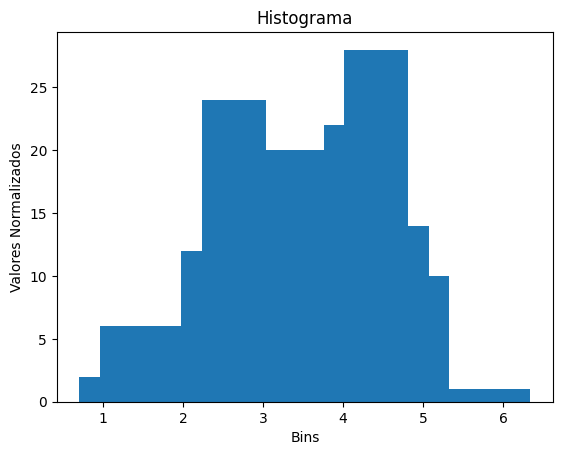

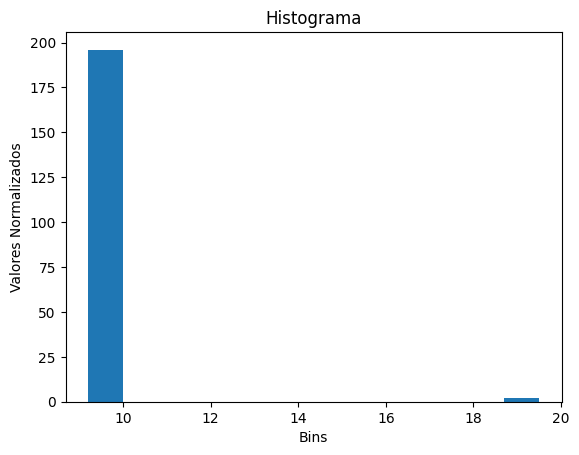

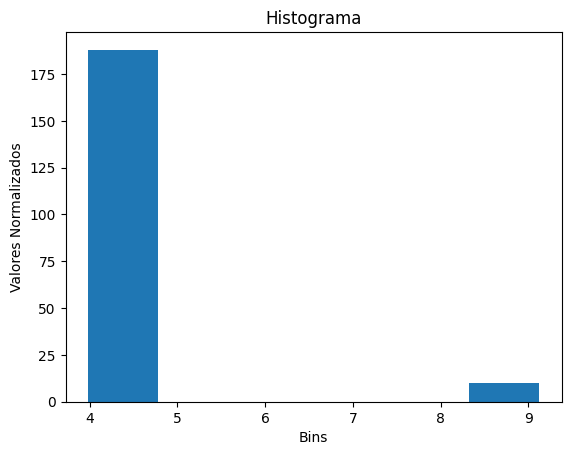

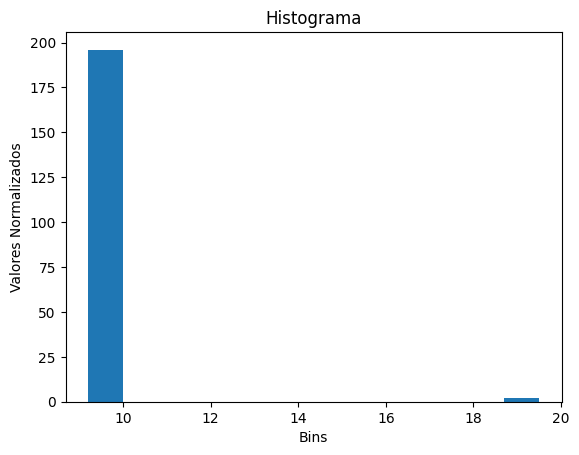

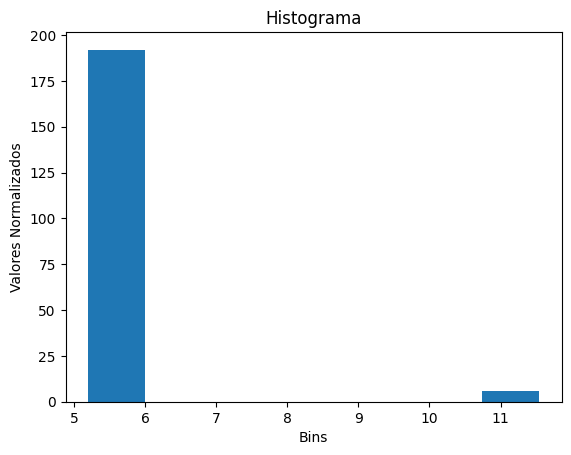

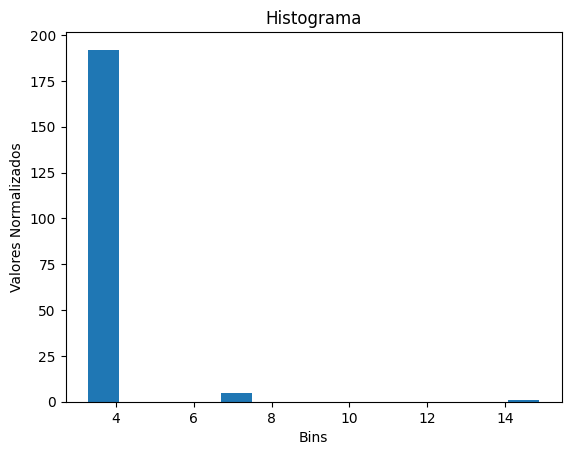

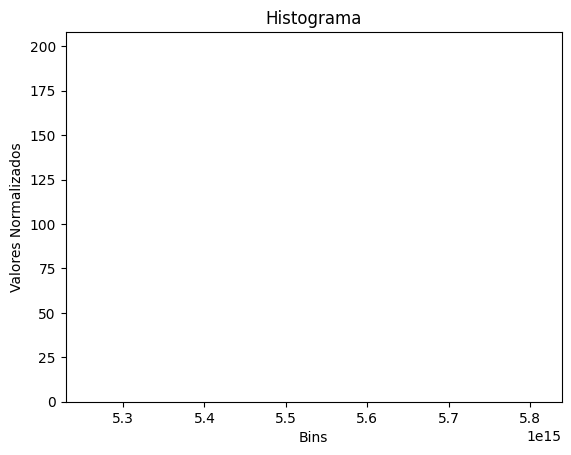

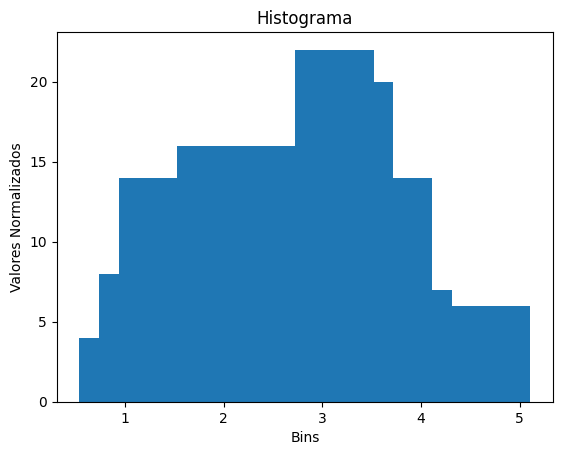

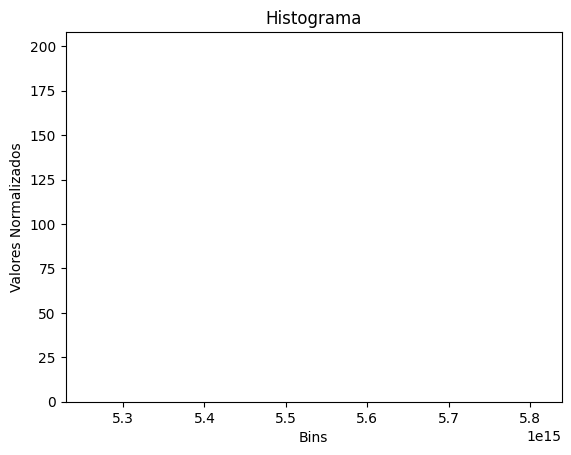

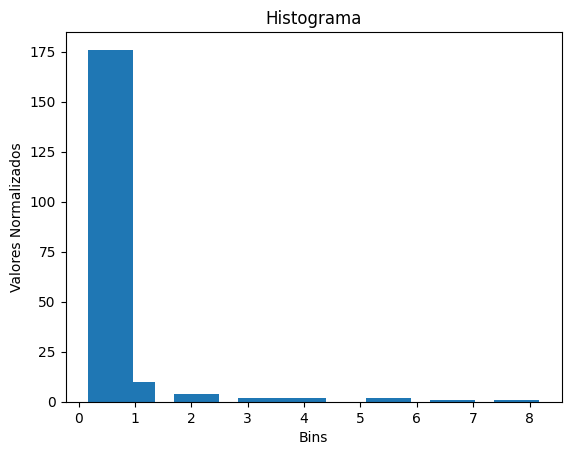

In [61]:
windows_by_sensors = windowing(emg_samples[:100], 10, 1, 4, 2)

for windows in windows_by_sensors:
  generate_hist(windows)


# mDWT (Transformada Discreta de Wavelet Multidimensional)

talvez apenas a DWT baste

In [62]:
import pywt

In [63]:
# monta uma lista com as mesmas dimensões da lista de janelamento para armazenar o
# resultado da feature de emg
def generate_dwt_features(windows_by_sensors):
  dwt_windows = [[] for sensor_windows in windows_by_sensors]

  for sensor_index in range(len(windows_by_sensors)):
    sensor_windows = windows_by_sensors[sensor_index]

    for window in sensor_windows:
      np_window = np.array(window)
      window_dwt = pywt.dwt(window, 'db1')

      dwt_windows[sensor_index].append(window_dwt)

  return dwt_windows



In [64]:
emg_samples = mat['emg']
windows_by_sensors = windowing(emg_samples[:100], 10, 1, 4, 2)
dwt_features = generate_dwt_features(windows_by_sensors)

for sensor_index in range (len(dwt_features)):
  print(sensor_index, ' === ',  dwt_features[sensor_index])

0  ===  [(array([0.08980256, 0.0794788 ]), array([0.00692965, 0.        ])), (array([0.0794788 , 0.06901362]), array([0., 0.])), (array([0.06901362, 0.06385174]), array([ 0.        , -0.00176777])), (array([0.06385174, 0.06215469]), array([-0.00176777,  0.00346482])), (array([0.06215469, 0.06561951]), array([0.00346482, 0.        ])), (array([0.06561951, 0.05352798]), array([0.        , 0.00516188])), (array([0.05352798, 0.04666905]), array([ 0.00516188, -0.0086267 ])), (array([0.04666905, 0.05699281]), array([-0.0086267 ,  0.00169706])), (array([0.05699281, 0.05352798]), array([ 0.00169706, -0.00176777])), (array([0.05352798, 0.05529575]), array([-0.00176777,  0.        ])), (array([0.05529575, 0.05522504]), array([0.        , 0.00346482])), (array([0.05522504, 0.0397394 ]), array([0.00346482, 0.00169706])), (array([0.0397394, 0.0655488]), array([ 0.00169706, -0.00346482])), (array([0.0655488 , 0.07254916]), array([-0.00346482,  0.        ])), (array([0.07254916, 0.07771104]), array([